# Data cleaning

In [38]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

In [39]:
df = pd.read_csv('../data/interim/EEA-SK-Ba.csv')
df.head()

,PM10 Concentration,PM10 Unit,DatetimeBegin,DatetimeEnd,PM2.5 Concentration,PM2.5 Unit,CO Concentration,CO Unit,NO2 Concentration,NO2 Unit,SO2 Concentration,SO2 Unit,C6H6 Concentration,C6H6 Unit
0,38.942,µg/m3,2018-01-01 00:00:00 +01:00,2018-01-01 01:00:00 +01:00,46.409,µg/m3,0.46168,mg/m3,21.6056,µg/m3,5.36549,µg/m3,1.10825,µg/m3
1,52.889,µg/m3,2018-01-01 01:00:00 +01:00,2018-01-01 02:00:00 +01:00,53.467,µg/m3,0.43268,mg/m3,21.1869,µg/m3,NaN,NaN,0.93600,µg/m3
2,37.007,µg/m3,2018-01-01 02:00:00 +01:00,2018-01-01 03:00:00 +01:00,37.668,µg/m3,0.39208,mg/m3,16.2845,µg/m3,5.14364,µg/m3,0.69225,µg/m3
3,35.837,µg/m3,2018-01-01 03:00:00 +01:00,2018-01-01 04:00:00 +01:00,37.333,µg/m3,0.38628,mg/m3,17.3246,µg/m3,5.16466,µg/m3,0.59800,µg/m3
4,34.408,µg/m3,2018-01-01 04:00:00 +01:00,2018-01-01 05:00:00 +01:00,29.130,µg/m3,0.36308,mg/m3,15.5656,µg/m3,5.23302,µg/m3,0.57200,µg/m3



## Timeseries cleaning

In [40]:
def timeCleaning(x):
    return x.rsplit(' ', 1)[0]
df['DatetimeBegin'] = df['DatetimeBegin'].apply(timeCleaning)
df.drop(columns='DatetimeEnd', inplace=True)
df.head()

,PM10 Concentration,PM10 Unit,DatetimeBegin,PM2.5 Concentration,PM2.5 Unit,CO Concentration,CO Unit,NO2 Concentration,NO2 Unit,SO2 Concentration,SO2 Unit,C6H6 Concentration,C6H6 Unit
0,38.942,µg/m3,2018-01-01 00:00:00,46.409,µg/m3,0.46168,mg/m3,21.6056,µg/m3,5.36549,µg/m3,1.10825,µg/m3
1,52.889,µg/m3,2018-01-01 01:00:00,53.467,µg/m3,0.43268,mg/m3,21.1869,µg/m3,NaN,NaN,0.93600,µg/m3
2,37.007,µg/m3,2018-01-01 02:00:00,37.668,µg/m3,0.39208,mg/m3,16.2845,µg/m3,5.14364,µg/m3,0.69225,µg/m3
3,35.837,µg/m3,2018-01-01 03:00:00,37.333,µg/m3,0.38628,mg/m3,17.3246,µg/m3,5.16466,µg/m3,0.59800,µg/m3
4,34.408,µg/m3,2018-01-01 04:00:00,29.130,µg/m3,0.36308,mg/m3,15.5656,µg/m3,5.23302,µg/m3,0.57200,µg/m3


## Removing unnecesary columns 

In [41]:
df.drop(['PM10 Unit', 'PM2.5 Unit', 'CO Unit', 'NO2 Unit', 'SO2 Unit', 'C6H6 Unit'], inplace=True, axis=1)
df.head()

,PM10 Concentration,DatetimeBegin,PM2.5 Concentration,CO Concentration,NO2 Concentration,SO2 Concentration,C6H6 Concentration
0,38.942,2018-01-01 00:00:00,46.409,0.46168,21.6056,5.36549,1.10825
1,52.889,2018-01-01 01:00:00,53.467,0.43268,21.1869,NaN,0.93600
2,37.007,2018-01-01 02:00:00,37.668,0.39208,16.2845,5.14364,0.69225
3,35.837,2018-01-01 03:00:00,37.333,0.38628,17.3246,5.16466,0.59800
4,34.408,2018-01-01 04:00:00,29.130,0.36308,15.5656,5.23302,0.57200


## NaN imputing

In [42]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df[['PM10 Concentration', 'PM2.5 Concentration', 'CO Concentration', 'NO2 Concentration', 'SO2 Concentration', 'C6H6 Concentration']])
df[['PM10 Concentration', 'PM2.5 Concentration', 'CO Concentration', 'NO2 Concentration', 'SO2 Concentration', 'C6H6 Concentration']] = imputer.transform(df[['PM10 Concentration', 'PM2.5 Concentration', 'CO Concentration', 'NO2 Concentration', 'SO2 Concentration', 'C6H6 Concentration']])
df

,PM10 Concentration,DatetimeBegin,PM2.5 Concentration,CO Concentration,NO2 Concentration,SO2 Concentration,C6H6 Concentration
0,38.942,2018-01-01 00:00:00,46.409,0.461680,21.6056,5.365490,1.108250
1,52.889,2018-01-01 01:00:00,53.467,0.432680,21.1869,7.526502,0.936000
2,37.007,2018-01-01 02:00:00,37.668,0.392080,16.2845,5.143640,0.692250
3,35.837,2018-01-01 03:00:00,37.333,0.386280,17.3246,5.164660,0.598000
4,34.408,2018-01-01 04:00:00,29.130,0.363080,15.5656,5.233020,0.572000
...,...,...,...,...,...,...,...
35061,13.676,2021-12-31 19:00:00,17.344,0.478848,64.6772,5.311171,1.606480
35062,20.128,2021-12-31 20:00:00,16.332,0.498800,64.6734,5.118110,1.327300
35063,20.175,2021-12-31 21:00:00,26.282,0.484764,58.2988,4.955310,1.443330
35064,20.246,2021-12-31 22:00:00,29.147,0.402288,48.8669,5.031390,1.365320


In [43]:
print(f'Number of rows with missing values: {len(df[df.isnull().any(axis=1)])}')

Number of rows with missing values: 0


## Outlier imputation

In [44]:
def QuantileImpute(df):
    for col in df.columns:
        if df[col].isnull().any():
            print(f'NaN found, aborting for col: {col}')
            continue
        
        df[col] = pd.to_numeric(df[col])
        q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
        q5, q95 = np.percentile(df[col], 5), np.percentile(df[col], 95)
        iqr = q75 - q25
        cutoff = round(iqr * 1.5, 5)
        lower, upper = q25 - cutoff, q75 + cutoff

        # replace values of col that are below lower for q5
        df.loc[df[col] < lower, col] = q5
        # replace values of col that are above upper for q95
        df.loc[df[col] > upper, col] = q95
    return df

df_imputed = QuantileImpute(df.loc[:, df.columns != 'DatetimeBegin'])
# add all of the new columns to the original dataframe
df[df_imputed.columns] = df_imputed
df

C:\Users\Gamebox\AppData\Local\Temp\ipykernel_1836\2435389467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])


,PM10 Concentration,DatetimeBegin,PM2.5 Concentration,CO Concentration,NO2 Concentration,SO2 Concentration,C6H6 Concentration
0,38.942,2018-01-01 00:00:00,38.809,0.461680,21.6056,5.365490,1.108250
1,52.889,2018-01-01 01:00:00,38.809,0.432680,21.1869,7.526502,0.936000
2,37.007,2018-01-01 02:00:00,37.668,0.392080,16.2845,5.143640,0.692250
3,35.837,2018-01-01 03:00:00,37.333,0.386280,17.3246,5.164660,0.598000
4,34.408,2018-01-01 04:00:00,29.130,0.363080,15.5656,5.233020,0.572000
...,...,...,...,...,...,...,...
35061,13.676,2021-12-31 19:00:00,17.344,0.478848,64.6772,5.311171,1.606480
35062,20.128,2021-12-31 20:00:00,16.332,0.498800,64.6734,5.118110,1.327300
35063,20.175,2021-12-31 21:00:00,26.282,0.484764,58.2988,4.955310,1.443330
35064,20.246,2021-12-31 22:00:00,29.147,0.402288,48.8669,5.031390,1.365320


c:\Users\Gamebox\Desktop\2024_CambalS_Adaptive_continuous_environment_remote_sensing\DPenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Gamebox\Desktop\2024_CambalS_Adaptive_continuous_environment_remote_sensing\DPenv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Gamebox\Desktop\2024_CambalS_Adaptive_continuous_environment_remote_sensing\DPenv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this wa

<Axes: >

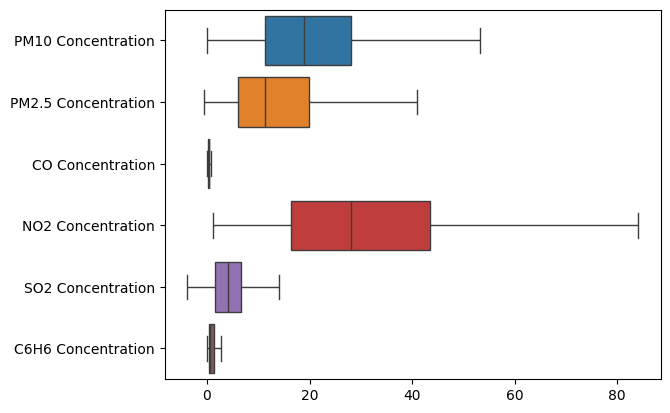

In [45]:
sns.boxplot(data=df.loc[:, df.columns != 'DatetimeBegin'], orient='h')

## Augmented Dickey-Fuller (ADF) unit root test
Augmented Dickey-Fuller (ADF) unit root test is defined as follows:
- $H_0$: the data possesses a unit root (random walk) and it is non-stationary.
- $H_a$: the data is stationary.

Result intepretation:
- if ADF statistic test < 1% 5% 10% (Critical Values) then $H_0$ is rejected
- if P-Value < 0.05 then $H_0$ is rejected 

In [46]:
cols_selected = []
for col in df.columns:
    if col == 'DatetimeBegin':
        continue
    missing = df[col].isnull().sum()
    if not missing:
        dftest = adfuller(df[col], autolag = 'AIC')
        if (dftest[1] < 0.05) and (dftest[2] > 3):
            cols_selected.append(col)
            print(col, '  ADF val: ', dftest[0], '\tp-value: ', dftest[1], '\tNum of lags: ', dftest[2])

PM10 Concentration   ADF val:  -15.23646314295913 	p-value:  5.23431449493552e-28 	Num of lags:  50
PM2.5 Concentration   ADF val:  -13.928693667375677 	p-value:  5.136627690475288e-26 	Num of lags:  51
CO Concentration   ADF val:  -10.965478921919859 	p-value:  8.124181831145982e-20 	Num of lags:  52
NO2 Concentration   ADF val:  -13.467120014002306 	p-value:  3.4390910542520416e-25 	Num of lags:  52
SO2 Concentration   ADF val:  -7.449596483827015 	p-value:  5.716968189449705e-11 	Num of lags:  50
C6H6 Concentration   ADF val:  -10.030137925997911 	p-value:  1.5930394858312835e-17 	Num of lags:  50


## STL decomposition

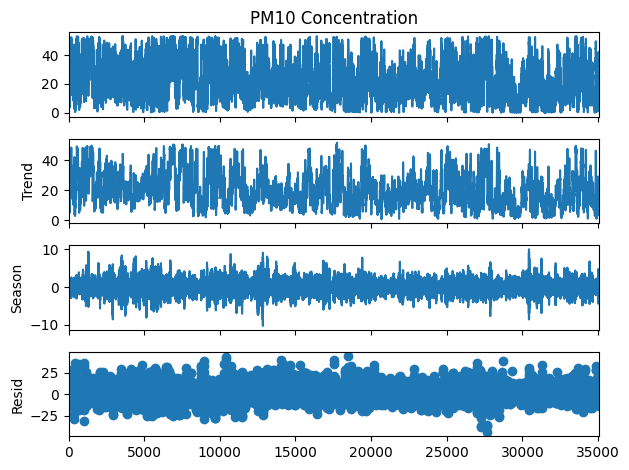

In [47]:
stl_pm10 = STL(df['PM10 Concentration'], period=6, robust = True).fit()
stl_pm10.plot()
plt.show()

In [48]:
stl_pm25 = STL(df['PM2.5 Concentration'], period=6, robust = True).fit()
stl_co = STL(df['CO Concentration'], period=6, robust = True).fit()
stl_no2 = STL(df['NO2 Concentration'], period=6, robust = True).fit()
stl_so2 = STL(df['SO2 Concentration'], period=6, robust = True).fit()
stl_c6h6 = STL(df['C6H6 Concentration'], period=6, robust = True).fit()

df_trend = pd.DataFrame({
    'DatetimeBegin': df['DatetimeBegin'],
    'PM10 Concentration': stl_pm10.trend,
    'PM2.5 Concentration': stl_pm25.trend,
    'CO Concentration': stl_co.trend,
    'NO2 Concentration': stl_no2.trend,
    'SO2 Concentration': stl_so2.trend,
    'C6H6 Concentration': stl_c6h6.trend
})

df_trend_season = pd.DataFrame({
    'DatetimeBegin': df['DatetimeBegin'],
    'PM10 Concentration': stl_pm10.trend + stl_pm10.seasonal,
    'PM2.5 Concentration': stl_pm25.trend + stl_pm25.seasonal,
    'CO Concentration': stl_co.trend + stl_co.seasonal,
    'NO2 Concentration': stl_no2.trend + stl_no2.seasonal,
    'SO2 Concentration': stl_so2.trend + stl_so2.seasonal,
    'C6H6 Concentration': stl_c6h6.trend + stl_c6h6.seasonal
})



## Saving cleaned data

In [49]:
df.to_csv('../data/processed/EEA-SK-Ba-clean.csv', sep=',', encoding='utf-8', index=False)
df_trend.to_csv('../data/processed/EEA-SK-Ba-trend.csv', sep=',', encoding='utf-8', index=False)
df_trend_season.to_csv('../data/processed/EEA-SK-Ba-trend-season.csv', sep=',', encoding='utf-8', index=False)